# ** Solving problems**

In the Fortune500 data, industry has some missing values. Use coalesce() to use sector's value as industry if industry is NULL. Then find the most common industry. With coalesce(), select the first value that is not NULL from industry, sector, or unknown as the fallback value. Name the result of the call to coalesce() as industry2. Count the number of rows with each industry2 value. Find the most common value of industry2.

In [ ]:
SELECT
    coalesce(industry, sector, 'Unknown') AS industry2,
    count(*)
FROM fortune500
GROUP BY 1
Order by 2 desc
Limit 1;

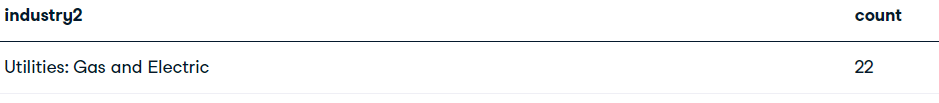

The information you need is sometimes split across multiple tables in the database.
What is the most common stackoverflow tag_type? What companies have a tag of that type?
To generate a list of such companies, you'll need to join three tables together.
Reference the entity relationship diagram as needed when determining which columns to use when joining tables.
Join the tag_company, company, and tag_type tables, keeping only mutually occurring records.
Select company.name, tag_type.tag, and tag_type.type for tags with the most common type from the previous step.

In [ ]:
SELECT
    company.name,
    tag_type.tag,
    tag_type.type
  FROM company
inner JOIN tag_company ON company.id = tag_company.company_id
inner JOIN tag_type ON tag_company.tag = tag_type.tag
WHERE type='cloud';

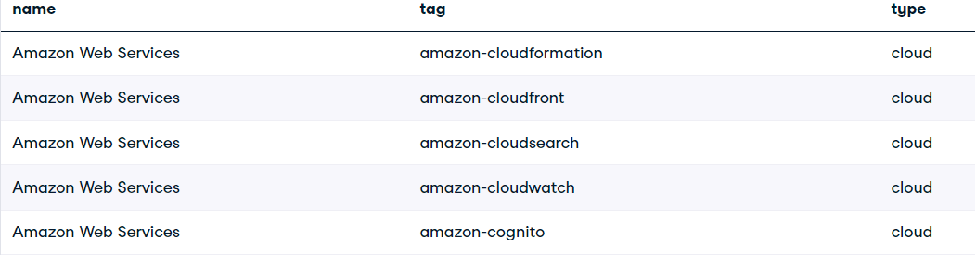


A local DJ has supplied uou with two tables, features and hit_tracks. As different variants of songs exist, she has asked you to return a joint table that matches on both the song id and dance level.



In [ ]:
SELECT
     name
FROM hit_tracks t
INNER JOIN features f
ON t.id=f.song_id AND t.dance=f.dance_level
ORDER BY name
LIMIT 5;

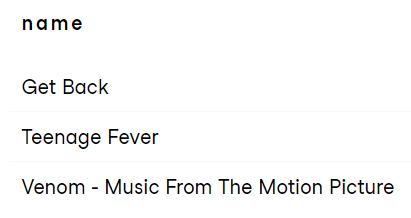

The artist_id column from the table awards contains the id of the artist who won a music for that year. For each year, return the award winning artist name. Only return rows with a match in both tables.


In [ ]:
select
    awards.year
    , artists.name
from awards
inner join artists on awards.artist_id = artists.id
order by awards.year desc
limit 5
;

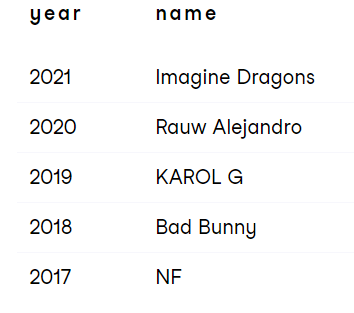

The first names and last names of directors are stored in separate columns in the directors table. In order to create an invitation list for a party, combine the first_name and last_name, separated by a space.

In [ ]:
select
  concat(first_name, ' ', last_name) as full_name
from directors
order by full_name
;

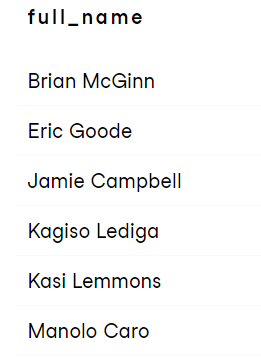

Determine the total quantity_ordered across al products for each order_number.

In [ ]:
select
  order_number,
  sum(quantity_ordered) as total_quantity
from order_details
group by order_number
order by order_number
limit 5
;

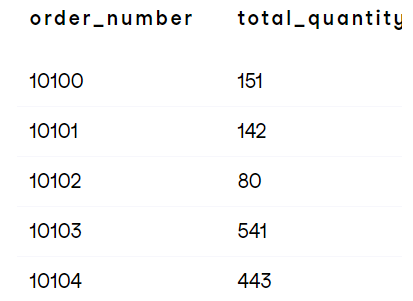

The food table gives nutritional information about various items. The calories are given in the energy column. Create a new column calorie_rating, that shows:
- high for items whose energy is over 300/100g
- medium for items whose energy is between 150/100g and 300/100g
- low for items whose energy is less than or equal to 150/100g

In [ ]:
select
  item,
  case
    when energy > 300 then 'high'
    when energy > 150 then 'medium'
    else 'low'
  end as calorie_rating
from food
order by item
;

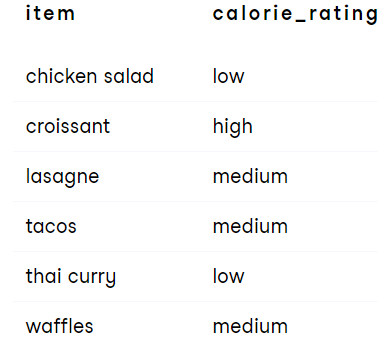

Query the list of CITY names from STATION that either do not start with vowels or do not end with vowels. Your result cannot contain duplicates.

In [ ]:
select
    distinct city
from station
where lower(left(city,1)) not in ('a', 'e', 'i', 'o', 'u')
    or lower(right(city,1)) not in ('a', 'e', 'i', 'o', 'u')
;

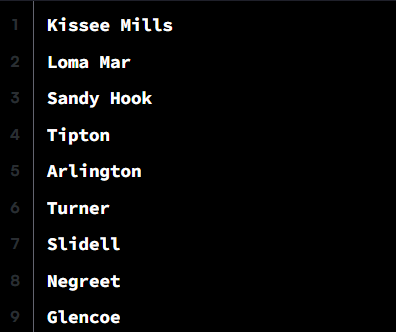

Query the song name, version and dance_level of songs contained within the all_tracks and song_features tables. The song_id and version together form a unique identifier.

In [ ]:
select
  t.name,
  t.version,
  t.dance_level
from all_tracks t
inner join song_features f
  on t.song_id = f.song_id and t.version = f.version
order by t.artist_id, t.song_id, t.version
limit 5
;

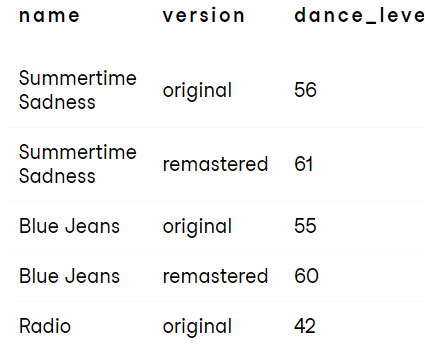

The performers table previewed below contains the artist name and the genre of their music. As an artist is not limited to one genre, genre consists of an array with multiple values. Display all artists and the first genre listed in the genre column.

In [ ]:
select
  artist,
  genre[1] as main_genre
from performers
order by artist
;

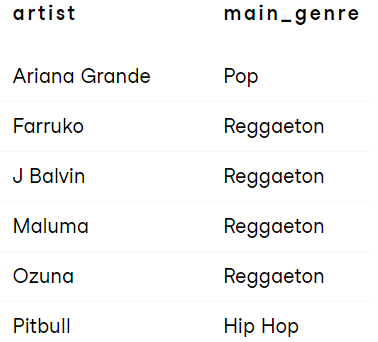

Filter the songs table for songs where the dance_level(table features) is greater than 75.

In [ ]:
select
  id,
  name,
  artist_id
from songs
where id in (
    select
      song_id
    from features
    where dance_level > 75
)
order by id
limit 5;

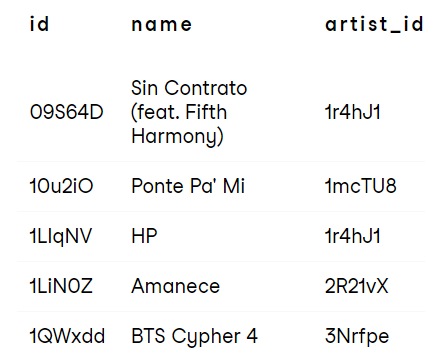

Extract the name of artists that start with a vowel ('A', 'E', 'I', 'O', 'U').

In [ ]:
select
  distinct name
from artists
where left(name, 1) in ('A', 'E', 'I', 'O', 'U')
order by name
limit 7;

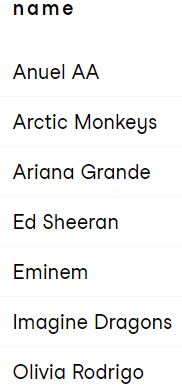

The values in genre column of the oerformers table are saved using inconsistent capitalization and your colleague is struggling to filter the data. Display all artists whose genre is Hip Hop, regardless of capitalization.

In [ ]:
select
  artist,
  genre
from performers
where genre ilike 'hip%hop'
order by artist
;

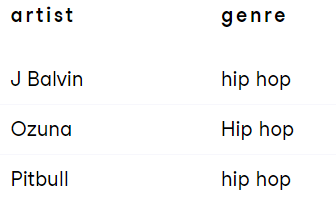

Return each artist_id and the number of songs they perform. Filter for artists that appear more than twenty times in the table.

In [ ]:
select
  artist_id,
  count(artist_id) as song_count
from songs
group by artist_id
having count(artist_id) > 20
order by song_count desc, artist_id
limit 5;

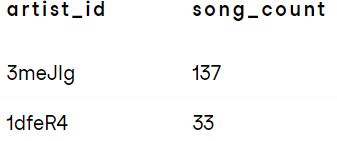

The tv_shows table contains the title and genre of a number of television series. As a series can belong to multiple genres, the genre column has an array data type. Select the 2nd genre in the genre column for each series.

In [ ]:
select
  genre[2] as second_genre
from tv_shows
order by genre
limit 5;

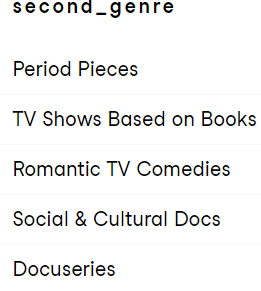

Determine the total number of songs in the tracks table where the duration_ms is above 100000 milliseconds.

In [ ]:
select
  count(*) as long_songs
from tracks
where duration_ms > 100000;

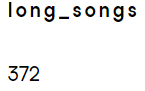

The food and wine tables contain the calories and prices of different items. Return the average energy of the food items and the average price of wine as a single row.

In [ ]:
select
  avg(energy) as avg_energy,
  (select
    avg(price)
    from wine) as avg_price
from food;

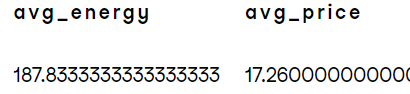

Return the average popularity for artists with a number of followers greater than 500000.

In [ ]:
select
  avg(popularity) as avg_popularity
from artists
where followers > 500000
limit 10;

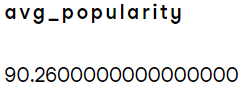